In [2]:
# origin image
import numpy as np
from PIL import Image
img = Image.open('lena.bmp')
img_array = np.array(img)
Image.fromarray(img_array)
Image.fromarray(img_array).save('lena.jpg')

In [3]:
# 用來顯示圖片的函數
from IPython.display import display
def show(img_array):
    display(Image.fromarray(img_array))

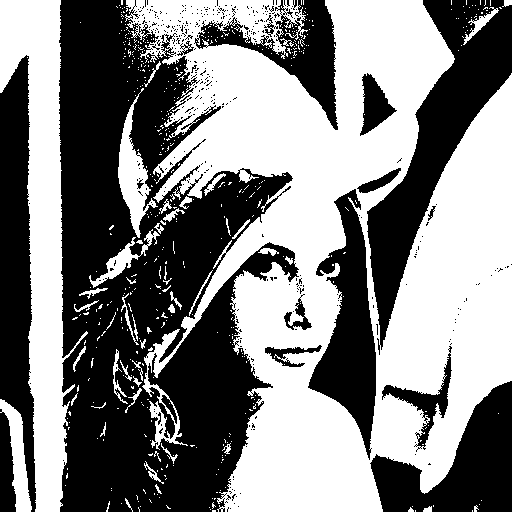

In [4]:
# binary
img_b_array = np.uint8(np.copy(img_array)>=128)*255
show(img_b_array)
Image.fromarray(img_b_array).save('lena_bin_128.jpg')

In [5]:
# kernel is a 3-5-5-5-3 octagon, where
# the orgin is at the center
kernel = [     [-2, -1], [-2, 0], [-2, 1],
          [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
          [0, -2], [0, -1], [0, 0], [0, 1], [0, 2],
          [1, -2], [1, -1], [1, 0], [1, 1], [1, 2],
              [2, -1], [2, 0], [2, 1]]
kernel_J = [[1,0], [0,0],[0,-1]]
kernel_K = [[0,1],[-1,1],[-1,0]]

In [6]:
# dilation
def dilation(img_array,kernel,pixel):
    img_d = np.copy(img_array)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if(img_array[i][j]==pixel):
                for k in kernel:
                    new_x = i + k[0]
                    new_y = j + k[1]
                    if(new_x >=0 and new_x<img_array.shape[0] and new_y>=0 and new_y<img_array.shape[1]):
                        img_d[new_x][new_y] = pixel
    return img_d

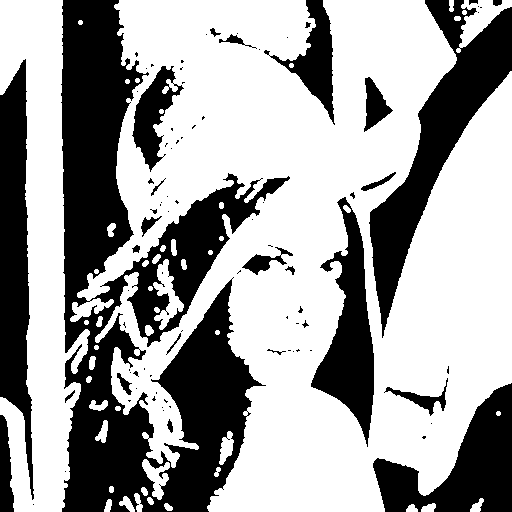

In [75]:
img_d = dilation(img_b_array,kernel,255)
show(img_d)
Image.fromarray(img_d).save('lena_bin_dil.jpg')

In [7]:
# erosion
def erosion(img_array,kernel,pixel):
    img_e = np.copy(img_array)
    length = len(kernel)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            count = 0
            for k in kernel:
                new_x = i + k[0]
                new_y = j + k[1]
                if(new_x >=0 and new_x<img_array.shape[0] and new_y>=0 and new_y<img_array.shape[1] and img_array[new_x][new_y]==pixel):
                    count += 1
            if(count < length):
                img_e[i][j] = 255-pixel
            if(count == length):
                img_e[i][j] = pixel
    return img_e

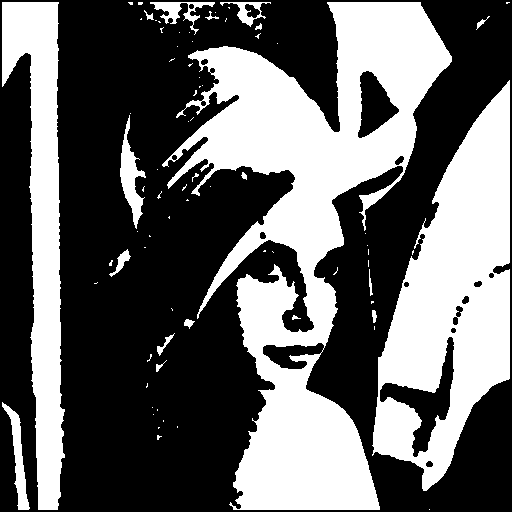

In [76]:
img_e = erosion(img_b_array,kernel,255)
show(img_e)
Image.fromarray(img_e).save('lena_bin_ero.jpg')

In [8]:
# hit and miss
def hit_and_miss(img_array,kernel_J,kernel_K,pixel):
    img_e_positive = erosion(img_array,kernel_J,pixel)
    img_e_negative = erosion(img_array,kernel_K,255-pixel)
    img_h_a_m = np.copy(img_e_positive)
    
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if(img_h_a_m[i][j] == 255):
                if(img_e_negative[i][j] != 255-pixel):
                    img_h_a_m[i][j] = 255-pixel
    return img_h_a_m

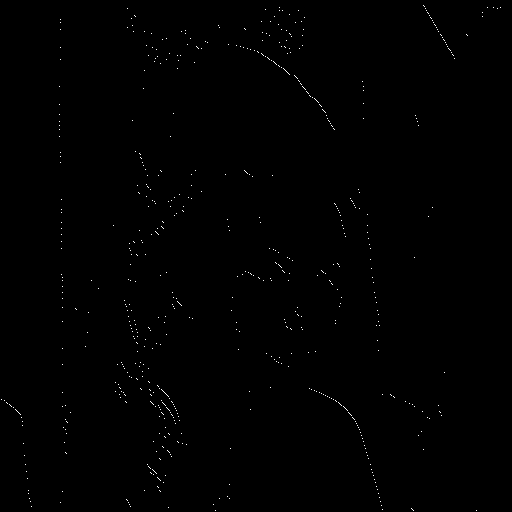

In [10]:
img_h_a_m = hit_and_miss(img_b_array,kernel_J,kernel_K,255)
show(img_h_a_m)
Image.fromarray(img_h_a_m).save('lena_bin_ham.jpg')

In [66]:
# opening
def opening(img_array,kernel,pixel):
    return dilation(erosion(img_array,kernel,pixel),kernel,pixel)

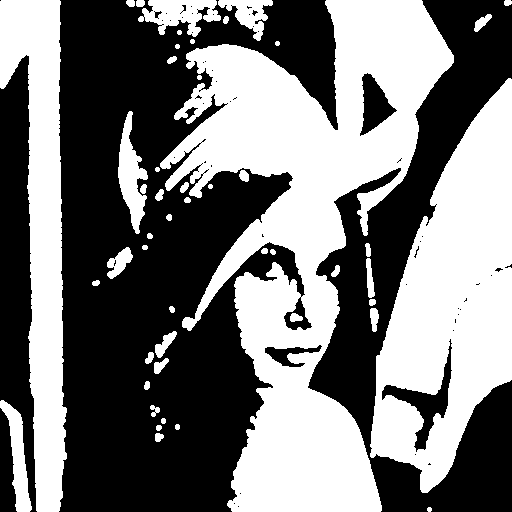

In [79]:
img_open = opening(img_b_array,kernel,255)
show(img_open)
Image.fromarray(img_open).save('lena_bin_open.jpg')

In [68]:
# closing
def closing(img_array,kernel,pixel):
    return erosion(dilation(img_array,kernel,pixel),kernel,pixel)

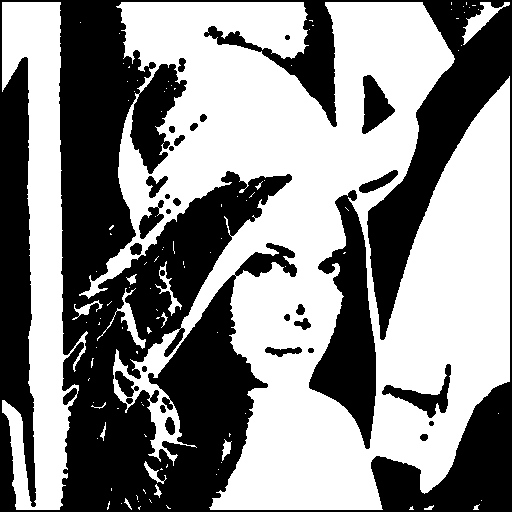

In [80]:
img_close = closing(img_b_array,kernel,255)
show(img_close)
Image.fromarray(img_close).save('lena_bin_close.jpg')